<a href="https://colab.research.google.com/github/yunseo4401/ML/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
import numpy as np
print(np.unique(train_target,return_counts=True))
#타깃변수가 9개임 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [16]:
train_scaled=train_input/255.0 
#255로 나누어 정규화 
train_scaled=train_scaled.reshape(-1,28*28)
#1차원배열로 바꾸어 줌 

In [17]:
from sklearn.model_selection import train_test_split 
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [30]:
dense1=keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
#신경망의 첫번째층은 입력층과 연결 매개변수로 반드시 입력해야함 
dense2=keras.layers.Dropout(0.3)
dense3=keras.layers.Dense(10,activation='softmax')
#출력층으로 10개의 클래스분류하므로 10개의 노드 
model=keras.Sequential([dense1,dense2,dense3])
#dense1과 dense2 객체ㅔ를 Sequential클래스에 추가하여 심층 신경망을 만든다. 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics='accuracy')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[early_stopping_cb])

In [32]:
print(early_stopping_cb.stopped_epoch)

9


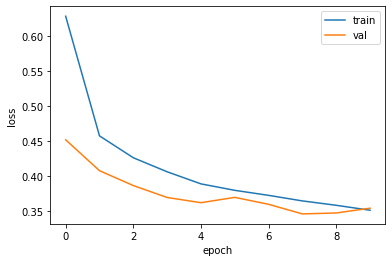

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [34]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8767


[0.34623265266418457, 0.8767499923706055]